- Link to dataset: https://www.kaggle.com/datasets/ferrariboy4k/top5leagues
- Data columns: 
    - Div — League Division
    - Date — Match Date
    - HomeTeam, AwayTeam — Home and Away Team
    - HTOa, ATOa — Teams FIFA Overall Rating
    - HTAt, ATAt — Teams FIFA Attack Rating
    - HTMid, ATMid — Teams FIFA Midfield Rating
    - HTDef, ATDef — Teams FIFA Defence Rating
    - HomeSquad, AwaySquad — Teams Number of players
    - HomeAvgAge, AwayAvgAge — Teams Average Age of players
    - HomeMV, AwayMV — Teams Total Market Value
    - FTHG, FTAG — Full Time Teams Goals
    - FTR — Full Time Result (H=Home Win, D=Draw, A=Away Win)
    - HTHG, HTAG — Half Time Teams Goals
    - HTR — Half Time Result (H=Home Win, D=Draw, A=Away Win)
    - HS, AS — Teams Shots
    - HST, AST — Teams Shots on Target
    - HF, AF — Teams Fouls
    - HC, AC — Teams Corners
    - HY, AY — Teams Yellow Cards
    - HR, AR — Teams Red Cards
    - HxG, AxG — Teams Expected Goals
    - HxA, AxA — Teams Expected Goals After Key Passes
    - HxPTS, AxPTS — Teams Expected Points
    - HPPDA, APPDA — Teams passes allowed per defensive action in the opposition half
    - B365H, B365D, B365A — Bet365 odds
    - BWH, BWD, BWA — Bet&Win odds
    - IWH, IWD, IWA — Interwetten odds
    - PSH, PSD, PSA — Pinnacle odds
    - WHH, WHD, WHA — William Hill odds
    - VCH, VCD, VCA — VC Bet odds
    - PSCH, PSCD, PSCA — PSC odds

In [108]:
#Import our necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
epl_data = pd.read_csv('Data/EPL 2021-2022.csv')
epl_data.head()

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,E0,2021-08-13,Brentford,Arsenal,73,79,73,82,73,80,...,2.05,4.00,3.40,1.90,4.10,3.40,2.00,3.94,3.33,2.13
1,E0,2021-08-14,Manchester United,Leeds,83,76,83,78,84,77,...,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.67,4.20,5.40
2,E0,2021-08-14,Burnley,Brighton,76,75,75,75,76,75,...,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.27,3.14,2.51
3,E0,2021-08-14,Chelsea,Crystal Palace,83,76,84,77,85,75,...,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.34,5.40,11.00
4,E0,2021-08-14,Everton,Southampton,79,76,80,76,79,76,...,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.05,3.45,4.07


In [84]:
epl_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HTOa,380.0,78.450000,3.446558,73.00,76.0000,78.000,80.2500,85.00
ATOa,380.0,78.460526,3.434424,73.00,76.0000,78.000,80.2500,85.00
HTAt,380.0,79.373684,3.820144,71.00,77.0000,78.000,83.0000,90.00
ATAt,380.0,79.323684,3.757556,71.00,76.0000,78.000,82.0000,90.00
HTMid,380.0,78.594737,3.779402,73.00,76.0000,78.000,81.0000,87.00
ATMid,380.0,78.589474,3.747280,73.00,76.0000,78.000,81.0000,87.00
HTDef,380.0,77.757895,3.510905,72.00,75.0000,77.000,79.0000,86.00
ATDef,380.0,77.794737,3.503481,72.00,75.0000,77.000,79.0000,86.00
HomeSquad,380.0,40.200000,4.713647,33.00,35.7500,40.500,44.0000,49.00
AwaySquad,380.0,40.200000,4.713647,33.00,35.7500,40.500,44.0000,49.00


In [85]:
epl_data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'HTOa', 'ATOa', 'HTAt', 'ATAt',
       'HTMid', 'ATMid', 'HTDef', 'ATDef', 'HomeSquad', 'AwaySquad',
       'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS', 'AxPTS',
       'HPPDA', 'APPDA', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [86]:
# Convert our dates into months and years columns, this will be helpful to see how things change over time
epl_data['Date'] = pd.to_datetime(epl_data['Date'])
# epl_data['Year'] = epl_data['Date'].apply(lambda date: date.year)
# epl_data['Month'] = epl_data['Date'].apply(lambda date: date.month)

In [87]:
# Drop the columns that we don't need
epl_data = epl_data.drop(['Div', 'HomeTeam', 'AwayTeam', 'HomeSquad', 'AwaySquad'], axis =1)

In [88]:
epl_data.head()

,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeAvgAge,AwayAvgAge,...,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,Year,Month
0,73,79,73,82,73,80,74,77,24,23,...,3.40,1.90,4.10,3.40,2.00,3.94,3.33,2.13,2021,8
1,83,76,83,78,84,77,83,76,25,23,...,4.33,5.80,1.55,4.40,6.00,1.67,4.20,5.40,2021,8
2,76,75,75,75,76,75,77,76,27,24,...,3.00,2.45,3.13,3.10,2.45,3.27,3.14,2.51,2021,8
3,83,76,84,77,85,75,82,74,25,25,...,5.50,13.00,1.25,5.75,13.00,1.34,5.40,11.00,2021,8
4,79,76,80,76,79,76,79,76,25,25,...,3.40,4.00,1.95,3.40,4.10,2.05,3.45,4.07,2021,8


<Axes: xlabel='HomeMV', ylabel='HTOa'>

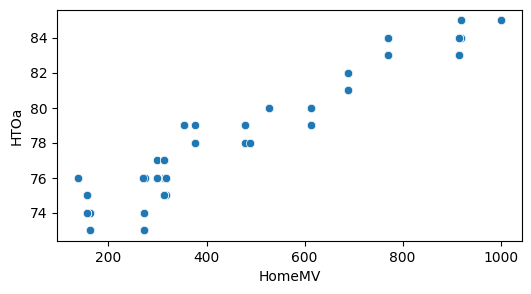

In [89]:
plt.figure(figsize=(6,3))
sns.scatterplot(data = epl_data, x = 'HomeMV', y = 'HTOa')

Here, we can see that generally, the more valuable a team (x-axis), the better rated that team is on FIFA (y-axis). This is logical as it shows that spending more money does tend to lead to a better quality of player. Whether this translates to results is a different question.

<Axes: xlabel='FTR', ylabel='BWH'>

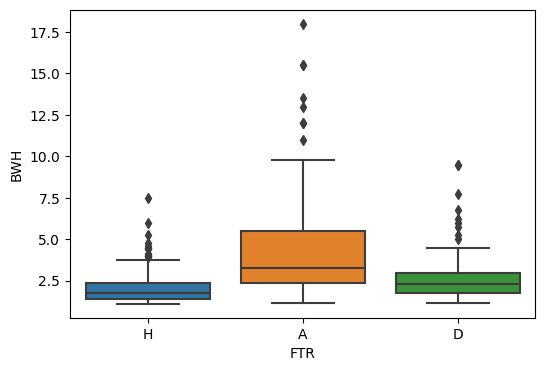

In [90]:
plt.figure(figsize=(6,4))
sns.boxplot(data = epl_data, x = 'FTR', y = 'BWH')

Here, we can see that on one betting site, home teams tend to be more of a favorite when they win than when they draw or lose. This made me wonder, is there a reason as to why the home teams tend to be favored?

In [91]:
epl_data['FTR'].value_counts()/380*100

FTR
H    42.894737
A    33.947368
D    23.157895
Name: count, dtype: float64

There is! They won 42.9% of their games in 2021-22, versus drawing 23.2%, and losing 33.9%. This is a pretty sizable difference.

In [102]:
epl_data_no_str = epl_data.drop(['FTR', 'HTR'], axis = 1)

In [122]:
epl_data_no_str.corr()['B365H'].sort_values(ascending = False)[0:7], 

#'VCH', 'WHH','IWH','PSH','BWH','PSCH'

B365H    1.000000
VCH      0.992959
WHH      0.992389
IWH      0.991613
PSH      0.988912
BWH      0.986806
PSCH     0.960357
Name: B365H, dtype: float64